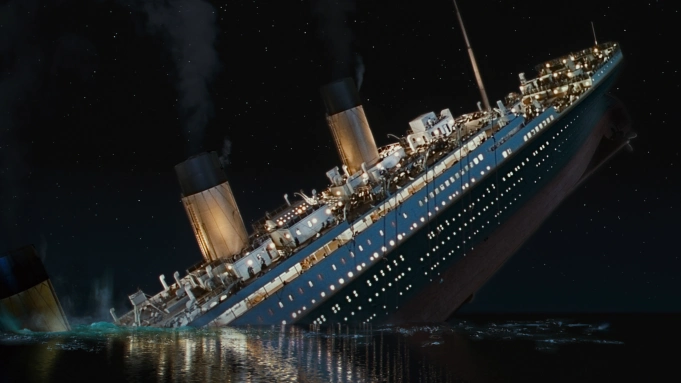

In [139]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [140]:
titanic_df = pd.read_csv(r"D:\Weiterbildung - Data Analyst\Dr. Markus Dozent (ML & AI)\MI\titanic.csv")
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [141]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [142]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [143]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [144]:
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)

titanic_df.drop(['Cabin', 'Embarked'], axis=1, inplace=True)

print(titanic_df.isnull().sum())


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
dtype: int64


In [145]:
titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df['Age'].median())

In [146]:
titanic_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
dtype: int64

In [147]:
titanic_df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

X = titanic_df.drop('Survived', axis=1)
y = titanic_df['Survived']

print("Ausgewählte Merkmale:")
print(X.head())


Ausgewählte Merkmale:
   Pclass     Sex   Age  SibSp  Parch     Fare
0       3    male  22.0      1      0   7.2500
1       1  female  38.0      1      0  71.2833
2       3  female  26.0      0      0   7.9250
3       1  female  35.0      1      0  53.1000
4       3    male  35.0      0      0   8.0500


In [148]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Logistische Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Support Vector Machine": SVC(),
    "Entscheidungsbaum": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
    
}
X_train_encoded = pd.get_dummies(X_train, columns=['Sex'], drop_first=True)
X_test_encoded = pd.get_dummies(X_test, columns=['Sex'], drop_first=True)

for name, model in models.items():
    model.fit(X_train_encoded, y_train)
    y_pred = model.predict(X_test_encoded)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"Modell: {name}")
    print(f"Genauigkeit: {accuracy:.2f}, Präzision: {precision:.2f}, Recall: {recall:.2f}, F1-Score: {f1:.2f}")
    print()


Modell: Logistische Regression
Genauigkeit: 0.81, Präzision: 0.80, Recall: 0.72, F1-Score: 0.76

Modell: K-Nearest Neighbors
Genauigkeit: 0.70, Präzision: 0.68, Recall: 0.53, F1-Score: 0.60

Modell: Naive Bayes
Genauigkeit: 0.77, Präzision: 0.73, Recall: 0.72, F1-Score: 0.72

Modell: Support Vector Machine
Genauigkeit: 0.65, Präzision: 0.75, Recall: 0.24, F1-Score: 0.37

Modell: Entscheidungsbaum
Genauigkeit: 0.75, Präzision: 0.70, Recall: 0.70, F1-Score: 0.70



Modell: Random Forest
Genauigkeit: 0.82, Präzision: 0.79, Recall: 0.76, F1-Score: 0.77



Genauigkeit (Accuracy): 
- Die Genauigkeit gibt an, wie oft das Modell korrekt vorhergesagt hat, ob ein Passagier überlebt hat oder nicht. Sie wird berechnet als der Anteil der korrekten Vorhersagen (überlebt oder nicht überlebt) an der Gesamtzahl der Vorhersagen.

Präzision (Precision): 
- Die Präzision gibt an, wie viele der als überlebt vorhergesagten Passagiere tatsächlich überlebt haben. Sie wird berechnet als der Anteil der korrekt vorhergesagten Überlebenden an allen als überlebt vorhergesagten Passagieren.

Recall (Sensitivität): 
- Der Recall gibt an, wie viele der tatsächlich überlebenden Passagiere vom Modell korrekt vorhergesagt wurden. Er wird berechnet als der Anteil der korrekt vorhergesagten Überlebenden an allen tatsächlich überlebenden Passagieren.

F1-Score: 
- Der F1-Score ist das harmonische Mittel zwischen Präzision und Recall und gibt eine einzige Metrik für die Modellleistung an. Er berücksichtigt sowohl False Positives (FP) als auch False Negatives (FN) und wird berechnet als 2 * (Präzision * Recall) / (Präzision + Recall).

Diese Metriken zeigen, wie gut das KNN-Modell die Vorhersage des Überlebens von Passagieren auf der Titanic durchführt. Es erreicht eine moderate Genauigkeit von 70%, wobei die Präzision bei 68% liegt. Der Recall beträgt 53%, was bedeutet, dass das Modell 53% der tatsächlich überlebenden Passagiere korrekt identifiziert hat. Der F1-Score, der Präzision und Recall kombiniert, beträgt 60%.

Diese Metriken zeigen, wie gut das SVM-Modell die Vorhersage des Überlebens von Passagieren auf der Titanic durchführt. Eine Genauigkeit von 65% bedeutet, dass das Modell in 65% der Fälle richtig liegt. Die Präzision von 75% zeigt, dass von den als überlebt vorhergesagten Passagieren 75% tatsächlich überlebt haben. Der Recall von 24% bedeutet, dass das Modell nur 24% der tatsächlich überlebenden Passagiere korrekt identifiziert hat. Der F1-Score von 37% ist das harmonische Mittel zwischen Präzision und Recall.

Dieser Code zeigt die Feature Importance der verschiedenen Merkmale des Titanic-Datensatzes an. Die Merkmale mit höheren Importance Scores sind entscheidender für die Klassifizierung durch den Decision Tree Classifier.


Diese Metriken zeigen die Leistung des Naive Bayes-Modells bei der Vorhersage des Überlebens von Passagieren auf der Titanic. Die Genauigkeit von 77% bedeutet, dass das Modell in 77% der Fälle richtig liegt. Die Präzision von 73% zeigt, dass von den als überlebt vorhergesagten Passagieren 73% tatsächlich überlebt haben. Der Recall von 72% bedeutet, dass das Modell 72% der tatsächlich überlebenden Passagiere korrekt identifiziert hat. Der F1-Score von 72% ist das harmonische Mittel zwischen Präzision und Recall.

Diese Metriken zeigen die Leistung des logistischen Regressionsmodells bei der Vorhersage des Überlebens von Passagieren auf der Titanic. Eine Genauigkeit von 81% bedeutet, dass das Modell in 81% der Fälle richtig lag. Die Präzision von 80% zeigt, dass von den als überlebt vorhergesagten Passagieren 80% tatsächlich überlebt haben. Der Recall von 72% bedeutet, dass das Modell 72% der tatsächlich überlebenden Passagiere korrekt identifiziert hat. Der F1-Score von 76% ist das harmonische Mittel zwischen Präzision und Recall.

In [149]:
titanic_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000
887,1,1,female,19.0,0,0,30.0000
888,0,3,female,28.0,1,2,23.4500
889,1,1,male,26.0,0,0,30.0000


In [150]:
import pandas as pd

sex_encoded = pd.get_dummies(titanic_df['Sex'], prefix='Sex', drop_first=True)
titanic_df_encoded = pd.concat([titanic_df.drop('Sex', axis=1), sex_encoded], axis=1)

print(titanic_df_encoded.head())

   Survived  Pclass   Age  SibSp  Parch     Fare  Sex_male
0         0       3  22.0      1      0   7.2500      True
1         1       1  38.0      1      0  71.2833     False
2         1       3  26.0      0      0   7.9250     False
3         1       1  35.0      1      0  53.1000     False
4         0       3  35.0      0      0   8.0500      True


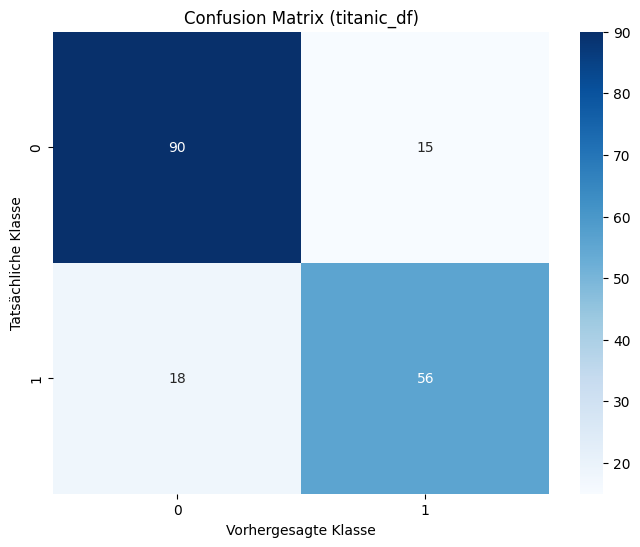

Classification Report (titanic_df):
              precision    recall  f1-score   support

           0       0.83      0.86      0.85       105
           1       0.79      0.76      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.81      0.82      0.82       179



In [151]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

sex_encoded = pd.get_dummies(titanic_df['Sex'], prefix='Sex', drop_first=True)
titanic_df3_encoded = pd.concat([titanic_df.drop('Sex', axis=1), sex_encoded], axis=1)

X = titanic_df3_encoded.drop('Survived', axis=1)
y = titanic_df3_encoded['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred3 = clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Vorhergesagte Klasse')
plt.ylabel('Tatsächliche Klasse')
plt.title('Confusion Matrix (titanic_df)')
plt.show()

report = classification_report(y_test, y_pred, target_names=["0", "1"])
print("Classification Report (titanic_df):")
print(report)


# Age pro pclass- mean

In [152]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
#%matplotlib inline

titanic_df2 = pd.read_csv(r"D:\Weiterbildung - Data Analyst\Dr. Markus Dozent (ML & AI)\MI\titanic.csv")
titanic_df2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


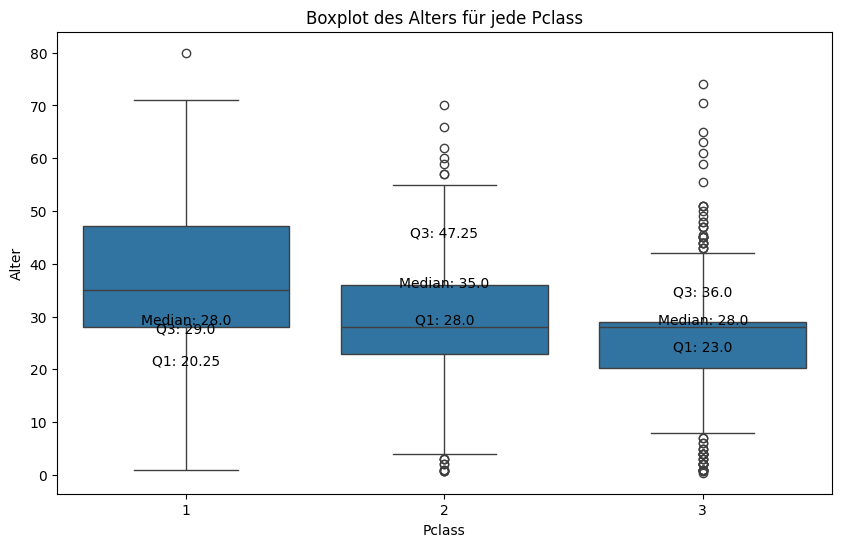

In [153]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Gruppierung der Daten nach 'Pclass' und Berechnung von Q1, Median (Q2) und Q3 für 'Age'
grouped = titanic_df.groupby('Pclass')['Age']
Q1 = grouped.quantile(0.25)
Q2 = grouped.median()
Q3 = grouped.quantile(0.75)

# Boxplot erstellen
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Age', data=titanic_df)
for i, pclass in enumerate(titanic_df['Pclass'].unique()):
    plt.text(i, Q1[pclass], f'Q1: {Q1[pclass]}', ha='center', va='bottom')
    plt.text(i, Q2[pclass], f'Median: {Q2[pclass]}', ha='center', va='bottom')
    plt.text(i, Q3[pclass], f'Q3: {Q3[pclass]}', ha='center', va='top')
plt.title('Boxplot des Alters für jede Pclass')
plt.xlabel('Pclass')
plt.ylabel('Alter')
plt.show()


In [154]:
titanic_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [155]:
titanic_df2.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [156]:
median_age_by_pclass = titanic_df.groupby('Pclass')['Age'].median()
mean_age_by_pclass = titanic_df.groupby('Pclass')['Age'].mean()

# Ausgabe der berechneten Werte
print("Median des Alters für jede Pclass:")
print(median_age_by_pclass)
print("\nMittelwert des Alters für jede Pclass:")
print(round(mean_age_by_pclass, 2))


Median des Alters für jede Pclass:
Pclass
1    35.0
2    28.0
3    28.0
Name: Age, dtype: float64

Mittelwert des Alters für jede Pclass:
Pclass
1    36.81
2    29.77
3    25.93
Name: Age, dtype: float64


In [157]:
# Filtern der Zeilen mit fehlenden Werten für das Alter
missing_age_rows = titanic_df2[titanic_df2['Age'].isnull()]

# Anzeigen der Pclass für die gefilterten Daten
print(missing_age_rows['Pclass'])


5      3
17     2
19     3
26     3
28     3
      ..
859    3
863    3
868    3
878    3
888    3
Name: Pclass, Length: 177, dtype: int64


In [158]:
# Gruppierung nach Pclass und Summierung der fehlenden Werte für das Alter
missing_age_by_pclass = missing_age_rows.groupby('Pclass')['Age'].size()

# Anzeige der Anzahl der fehlenden Werte pro Pclass
print("Anzahl der fehlenden Werte pro Pclass:")
print(missing_age_by_pclass)


Anzahl der fehlenden Werte pro Pclass:
Pclass
1     30
2     11
3    136
Name: Age, dtype: int64


In [159]:
mean_age_by_pclass = titanic_df2.groupby('Pclass')['Age'].mean()

for pclass, mean_age in mean_age_by_pclass.items():
    titanic_df2.loc[(titanic_df2['Pclass'] == pclass) & (titanic_df2['Age'].isnull()), 'Age'] = mean_age

print("Anzahl der fehlenden Werte für das Alter nach der Ersetzung:")
print(titanic_df2['Age'].isnull().sum())


Anzahl der fehlenden Werte für das Alter nach der Ersetzung:
0


In [160]:
titanic_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [161]:
titanic_df2.drop(['PassengerId', 'Name', 'Ticket','Cabin', 'Embarked'], axis=1, inplace=True)

X = titanic_df2.drop('Survived', axis=1)
y = titanic_df2['Survived']

print("Ausgewählte Merkmale:")
print(X.head())


Ausgewählte Merkmale:
   Pclass     Sex   Age  SibSp  Parch     Fare
0       3    male  22.0      1      0   7.2500
1       1  female  38.0      1      0  71.2833
2       3  female  26.0      0      0   7.9250
3       1  female  35.0      1      0  53.1000
4       3    male  35.0      0      0   8.0500


In [162]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Logistische Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Support Vector Machine": SVC(),
    "Entscheidungsbaum": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
    
}
X_train_encoded = pd.get_dummies(X_train, columns=['Sex'], drop_first=True)
X_test_encoded = pd.get_dummies(X_test, columns=['Sex'], drop_first=True)

for name, model in models.items():
    model.fit(X_train_encoded, y_train)
    y_pred = model.predict(X_test_encoded)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"Modell: {name}")
    print(f"Genauigkeit: {accuracy:.2f}, Präzision: {precision:.2f}, Recall: {recall:.2f}, F1-Score: {f1:.2f}")
    print()


Modell: Logistische Regression
Genauigkeit: 0.83, Präzision: 0.82, Recall: 0.74, F1-Score: 0.78

Modell: K-Nearest Neighbors
Genauigkeit: 0.71, Präzision: 0.68, Recall: 0.55, F1-Score: 0.61

Modell: Naive Bayes
Genauigkeit: 0.77, Präzision: 0.73, Recall: 0.72, F1-Score: 0.72

Modell: Support Vector Machine
Genauigkeit: 0.65, Präzision: 0.75, Recall: 0.24, F1-Score: 0.37

Modell: Entscheidungsbaum
Genauigkeit: 0.76, Präzision: 0.71, Recall: 0.70, F1-Score: 0.71



Modell: Random Forest
Genauigkeit: 0.80, Präzision: 0.77, Recall: 0.73, F1-Score: 0.75



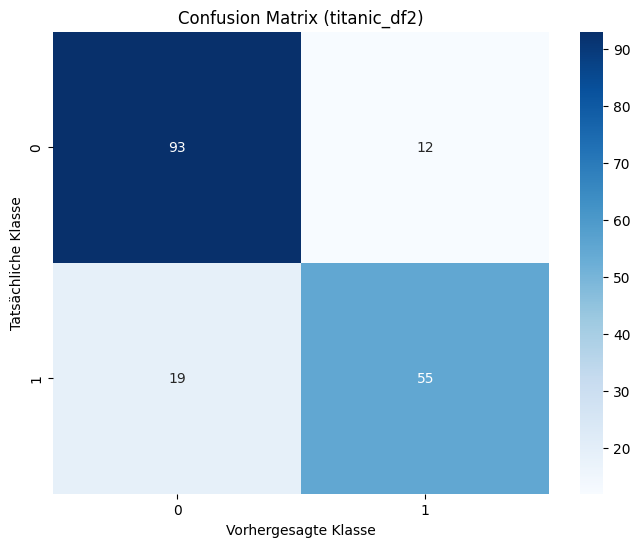

Classification Report (titanic_df2):
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       105
           1       0.82      0.74      0.78        74

    accuracy                           0.83       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.83      0.83      0.83       179



In [163]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

sex_encoded = pd.get_dummies(titanic_df2['Sex'], prefix='Sex', drop_first=True)
titanic_df3_encoded = pd.concat([titanic_df2.drop('Sex', axis=1), sex_encoded], axis=1)

X = titanic_df3_encoded.drop('Survived', axis=1)
y = titanic_df3_encoded['Survived']

X_train, X_test, y_train, y_test2 = train_test_split(X, y, test_size=0.2, random_state=42)
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred2 = clf.predict(X_test)

cm = confusion_matrix(y_test2, y_pred2)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Vorhergesagte Klasse')
plt.ylabel('Tatsächliche Klasse')
plt.title('Confusion Matrix (titanic_df2)')
plt.show()

report = classification_report(y_test2, y_pred2, target_names=["0", "1"])
print("Classification Report (titanic_df2):")
print(report)


# Age pro pclass- median

In [164]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

titanic_df3 = pd.read_csv(r"D:\Weiterbildung - Data Analyst\Dr. Markus Dozent (ML & AI)\MI\titanic.csv")
titanic_df3.head()

mean_age_by_pclass = titanic_df3.groupby('Pclass')['Age'].median()

for pclass, mean_age in mean_age_by_pclass.items():
    titanic_df3.loc[(titanic_df3['Pclass'] == pclass) & (titanic_df3['Age'].isnull()), 'Age'] = mean_age


titanic_df3.drop(['PassengerId', 'Name', 'Ticket','Cabin', 'Embarked'], axis=1, inplace=True)

X = titanic_df3.drop('Survived', axis=1)
y = titanic_df3['Survived']

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Logistische Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Support Vector Machine": SVC(),
    "Entscheidungsbaum": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
    
}
X_train_encoded = pd.get_dummies(X_train, columns=['Sex'], drop_first=True)
X_test_encoded = pd.get_dummies(X_test, columns=['Sex'], drop_first=True)

for name, model in models.items():
    model.fit(X_train_encoded, y_train)
    y_pred = model.predict(X_test_encoded)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"Modell: {name}")
    print(f"Genauigkeit: {accuracy:.2f}, Präzision: {precision:.2f}, Recall: {recall:.2f}, F1-Score: {f1:.2f}")
    print()

Modell: Logistische Regression
Genauigkeit: 0.83, Präzision: 0.82, Recall: 0.74, F1-Score: 0.78

Modell: K-Nearest Neighbors
Genauigkeit: 0.72, Präzision: 0.70, Recall: 0.57, F1-Score: 0.63

Modell: Naive Bayes
Genauigkeit: 0.77, Präzision: 0.73, Recall: 0.72, F1-Score: 0.72

Modell: Support Vector Machine
Genauigkeit: 0.65, Präzision: 0.75, Recall: 0.24, F1-Score: 0.37

Modell: Entscheidungsbaum
Genauigkeit: 0.76, Präzision: 0.72, Recall: 0.69, F1-Score: 0.70

Modell: Random Forest
Genauigkeit: 0.80, Präzision: 0.79, Recall: 0.72, F1-Score: 0.75



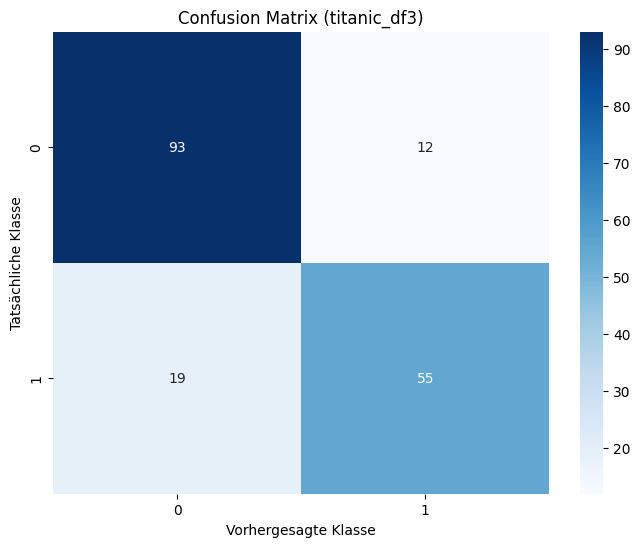

Classification Report (titanic_df3):
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       105
           1       0.82      0.74      0.78        74

    accuracy                           0.83       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.83      0.83      0.83       179



In [165]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

sex_encoded = pd.get_dummies(titanic_df3['Sex'], prefix='Sex', drop_first=True)
titanic_df3_encoded = pd.concat([titanic_df3.drop('Sex', axis=1), sex_encoded], axis=1)

X = titanic_df3_encoded.drop('Survived', axis=1)
y = titanic_df3_encoded['Survived']

X_train, X_test, y_train, y_test3 = train_test_split(X, y, test_size=0.2, random_state=42)
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred3 = clf.predict(X_test)

cm = confusion_matrix(y_test3, y_pred3)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Vorhergesagte Klasse')
plt.ylabel('Tatsächliche Klasse')
plt.title('Confusion Matrix (titanic_df3)')
plt.show()

report = classification_report(y_test3, y_pred3, target_names=["0", "1"])
print("Classification Report (titanic_df3):")
print(report)


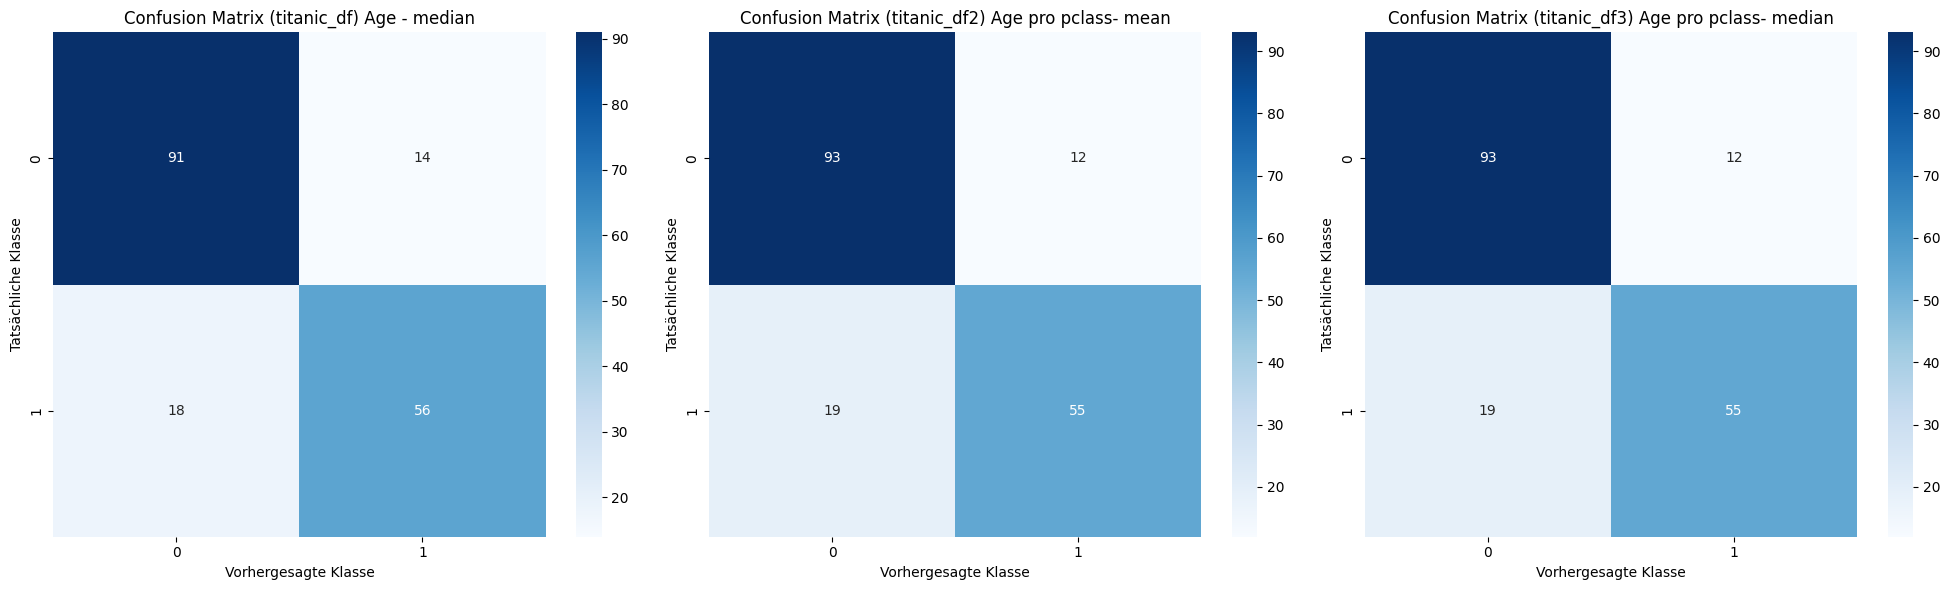

Classification Report (titanic_df):
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.76      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179

Classification Report (titanic_df2):
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       105
           1       0.82      0.74      0.78        74

    accuracy                           0.83       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.83      0.83      0.83       179

Classification Report (titanic_df3):
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       105
           1       0.82      0.74      0.78        74

    accuracy                           0.83       179
   macro avg      

In [174]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Diagramm für titanic_df
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title('Confusion Matrix (titanic_df) Age - median' )
axes[0].set_xlabel('Vorhergesagte Klasse')
axes[0].set_ylabel('Tatsächliche Klasse')

# Diagramm für titanic_df2
sns.heatmap(confusion_matrix(y_test2, y_pred2), annot=True, fmt="d", cmap="Blues", ax=axes[1])
axes[1].set_title('Confusion Matrix (titanic_df2) Age pro pclass- mean')
axes[1].set_xlabel('Vorhergesagte Klasse')
axes[1].set_ylabel('Tatsächliche Klasse')

# Diagramm für titanic_df3
sns.heatmap(confusion_matrix(y_test3, y_pred3), annot=True, fmt="d", cmap="Blues", ax=axes[2])
axes[2].set_title('Confusion Matrix (titanic_df3) Age pro pclass- median')
axes[2].set_xlabel('Vorhergesagte Klasse')
axes[2].set_ylabel('Tatsächliche Klasse')

plt.tight_layout()
plt.show()

report = classification_report(y_test, y_pred, target_names=["0", "1"])
print("Classification Report (titanic_df):")
print(report)
report2 = classification_report(y_test2, y_pred2, target_names=["0", "1"])
print("Classification Report (titanic_df2):")
print(report2)
report3 = classification_report(y_test3, y_pred3, target_names=["0", "1"])
print("Classification Report (titanic_df3):")
print(report3)

# Feature Engineering 

In [167]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Laden des Titanic-Datensatzes
titanic_df = pd.read_csv('titanic.csv')

# Spalten für das Feature Engineering auswählen
selected_columns = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

# Pipeline für numerische Spalten
numeric_features = ['Age', 'SibSp', 'Parch', 'Fare']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Pipeline für kategoriale Spalten
categorical_features = ['Pclass', 'Sex', 'Embarked']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first'))
])

# ColumnTransformer für alle Spalten
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Feature Engineering durchführen
processed_features = preprocessor.fit_transform(titanic_df[selected_columns])

# Konvertieren in DataFrame
processed_df = pd.DataFrame(processed_features, columns = preprocessor.get_feature_names_out())

# Ergebnisse anzeigen
print(processed_df.head())


   num__Age  num__SibSp  num__Parch  num__Fare  cat__Pclass_2  cat__Pclass_3  \
0 -0.565736    0.432793   -0.473674  -0.502445            0.0            1.0   
1  0.663861    0.432793   -0.473674   0.786845            0.0            0.0   
2 -0.258337   -0.474545   -0.473674  -0.488854            0.0            1.0   
3  0.433312    0.432793   -0.473674   0.420730            0.0            0.0   
4  0.433312   -0.474545   -0.473674  -0.486337            0.0            1.0   

   cat__Sex_male  cat__Embarked_Q  cat__Embarked_S  
0            1.0              0.0              1.0  
1            0.0              0.0              0.0  
2            0.0              0.0              1.0  
3            0.0              0.0              1.0  
4            1.0              0.0              1.0  


In [168]:
# 1. Auswahl eines Modells und Import der erforderlichen Bibliotheken
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 2. Aufteilung der Daten
X_train, X_test, y_train, y_test = train_test_split(processed_features, y, test_size=0.2, random_state=42)

# 3. Modelltraining
model = LogisticRegression()
model.fit(X_train, y_train)

# 4. Modellbewertung
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Ausgabe der Metriken
print("Genauigkeit:", accuracy)
print("Präzision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)


Genauigkeit: 0.7988826815642458
Präzision: 0.7794117647058824
Recall: 0.7162162162162162
F1-Score: 0.7464788732394366


In [169]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Aufteilung der Daten
X_train, X_test, y_train, y_test = train_test_split(processed_features, y, test_size=0.2, random_state=42)

# Definition der Modelle
models = {
    "Logistische Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Support Vector Machine": SVC(),
    "Entscheidungsbaum": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

# Iteration über jedes Modell
for name, model in models.items():
    # Modelltraining
    model.fit(X_train, y_train)
    
    # Vorhersagen machen
    y_pred = model.predict(X_test)
    
    # Metriken berechnen
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Ausgabe der Metriken
    print(f"Modell: {name}")
    print("Genauigkeit:", accuracy)
    print("Präzision:", precision)
    print("Recall:", recall)
    print("F1-Score:", f1)
    print("\n")


Modell: Logistische Regression
Genauigkeit: 0.7988826815642458
Präzision: 0.7794117647058824
Recall: 0.7162162162162162
F1-Score: 0.7464788732394366


Modell: K-Nearest Neighbors
Genauigkeit: 0.8100558659217877
Präzision: 0.7941176470588235
Recall: 0.7297297297297297
F1-Score: 0.7605633802816901


Modell: Naive Bayes
Genauigkeit: 0.7653631284916201
Präzision: 0.7105263157894737
Recall: 0.7297297297297297
F1-Score: 0.72


Modell: Support Vector Machine
Genauigkeit: 0.8156424581005587
Präzision: 0.8059701492537313
Recall: 0.7297297297297297
F1-Score: 0.7659574468085106


Modell: Entscheidungsbaum
Genauigkeit: 0.7597765363128491
Präzision: 0.7066666666666667
Recall: 0.7162162162162162
F1-Score: 0.7114093959731543


Modell: Random Forest
Genauigkeit: 0.8100558659217877
Präzision: 0.7941176470588235
Recall: 0.7297297297297297
F1-Score: 0.7605633802816901




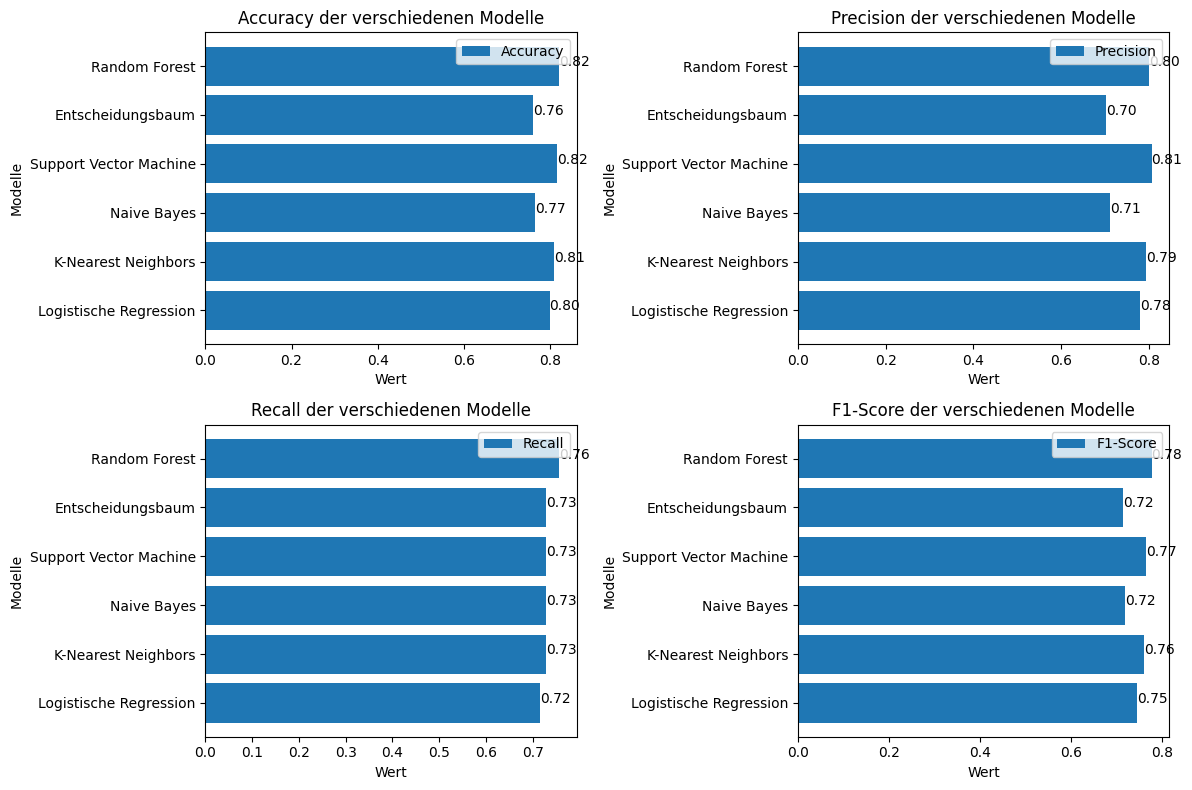

In [170]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Aufteilung der Daten
X_train, X_test, y_train, y_test = train_test_split(processed_features, y, test_size=0.2, random_state=42)

# Definition der Modelle
models = {
    "Logistische Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Support Vector Machine": SVC(),
    "Entscheidungsbaum": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

# Ergebnisse speichern
results = {}

# Iteration über jedes Modell
for name, model in models.items():
    # Modelltraining
    model.fit(X_train, y_train)
    
    # Vorhersagen machen
    y_pred = model.predict(X_test)
    
    # Metriken berechnen
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Ergebnisse speichern
    results[name] = {"Accuracy": accuracy, "Precision": precision, "Recall": recall, "F1-Score": f1}

# Erstellen des DataFrame results_df
results_df = pd.DataFrame(results)

# Definition der Metriken und Modelle für die Visualisierung
metrics = ["Accuracy", "Precision", "Recall", "F1-Score"]
models = {
    "Logistische Regression": results_df["Logistische Regression"],
    "K-Nearest Neighbors": results_df["K-Nearest Neighbors"],
    "Naive Bayes": results_df["Naive Bayes"],
    "Support Vector Machine": results_df["Support Vector Machine"],
    "Entscheidungsbaum": results_df["Entscheidungsbaum"],
    "Random Forest": results_df["Random Forest"]
}

# Erstellung der Visualisierung
plt.figure(figsize=(12, 8))

for i, metric in enumerate(metrics):
    plt.subplot(2, 2, i+1)
    plt.barh(list(models.keys()), [model[metric] for model in models.values()], label=metric)
    for index, value in enumerate([model[metric] for model in models.values()]):
        plt.text(value, index, f"{value:.2f}")
    plt.xlabel('Wert')
    plt.ylabel('Modelle')
    plt.title(f'{metric} der verschiedenen Modelle')
    plt.legend()

plt.tight_layout()
plt.show()
